In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from time import sleep
import serial
import contextlib

In [115]:

port="/dev/ttyUSB1"
ser=serial.Serial(port, 115200)

In [ ]:
@contextlib.contextmanager
def smart_open(filename=None, mode="w"):
  if filename and filename != '-':
    fh = open(filename, mode)
  else:
    if mode == "r":
      fh = os.fdopen(sys.stdin.fileno(), mode, closefd=False)
    else:
      fh = os.fdopen(sys.stdout.fileno(), mode, closefd=False)
  try:
    yield fh
  finally:
    if filename and filename != '-':
      fh.close()
      


# Experimentos

Lanzamos varios experimentos, para ver como "pierde" la DRAM si no hacemos refresh periodicamante. La trampa es que cuando leemos una fila, eso la refresca, por lo que so queremos saber el estado de la DRAM tras x minutos sin refresco, tiene que pasar x minutos desde la ultima lectura.

## Experimento 1

Bucle, cada vez initializamos todo a F, esperamos t minutos, y volcamos un dump, se guarda en fichero y en imagenes

Sleep 0 min...
3840
Image saved to dram00000.png


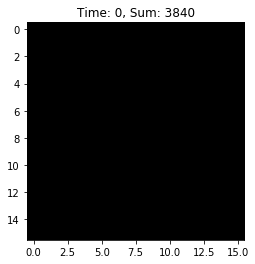

Sleep 1 min...
3840
Image saved to dram00001.png


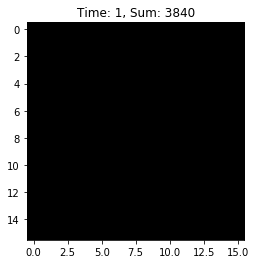

Sleep 2 min...
3840
Image saved to dram00002.png


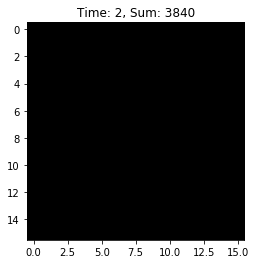

Sleep 3 min...
3840
Image saved to dram00003.png


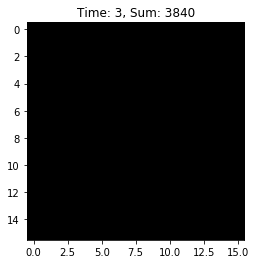

Sleep 4 min...
3829
Image saved to dram00004.png


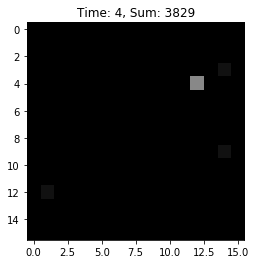

Sleep 5 min...
3756
Image saved to dram00005.png


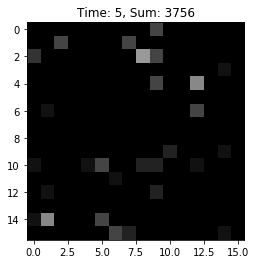

Sleep 6 min...
3588
Image saved to dram00006.png


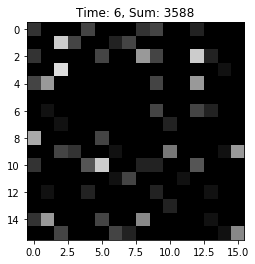

Sleep 7 min...
3278
Image saved to dram00007.png


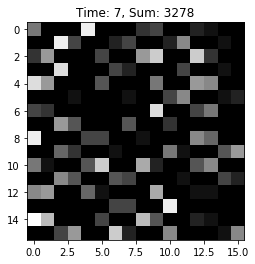

Sleep 8 min...
2897
Image saved to dram00008.png


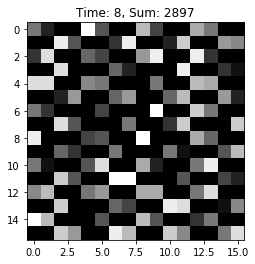

Sleep 9 min...
2550
Image saved to dram00009.png


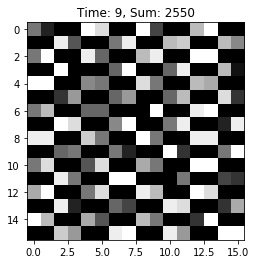

Sleep 10 min...
2390
Image saved to dram00010.png


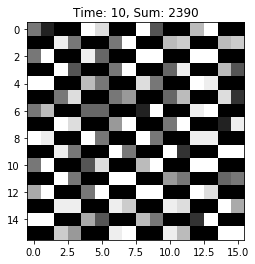

Sleep 11 min...
2293
Image saved to dram00011.png


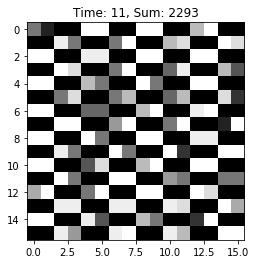

Sleep 12 min...
2148
Image saved to dram00012.png


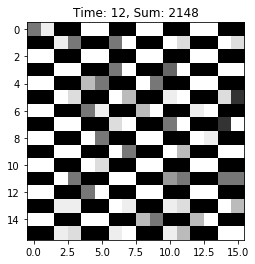

Sleep 13 min...
2068
Image saved to dram00013.png


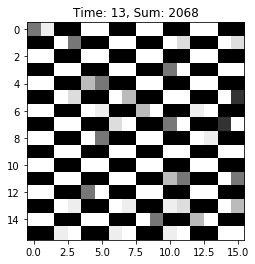

Sleep 14 min...


KeyboardInterrupt: 

In [105]:
t=0

with smart_open("dump.txt", 'w') as f:
    for t in range(14,100):
        # Initialiaze all ram to F
        ser.write( bytes( [ 102, 32, 102, 10 ] ) ) # "f f\n"
        # sleep t minutes:
        print("Sleep %d min..." % t )
        sleep(t*60)
        # dump ram
        ser.write( bytes( [ 68, 10 ] ) ) # "D\n"

        # read response , convert from bytes to ascii str, and split:
        dump, sumhex = str(ser.readline(),'ascii').split()

        # save to file
        f.write("%d %s\n" % (t, dump))
        f.flush()

        print(int(sumhex,16))
        
        d=np.array([ int(i,16) for i in dump ])
        d=d.reshape(16,16)
    
        plt.title('Time: {time}, Sum: {s}'.format(time=t, s=d.sum()))
        plt.imshow(15-d, cmap='gray',vmin=0, vmax=15)
        plt.savefig("dram%05d.png"%t)
        print("Image saved to dram%05d.png"%t)
        plt.show() # always show() after savefig()!!

## Experimento 2
Inicializamos 1 vez solo, al principio, con el valor B

Bucle, cada vez,  esperamos t minutos, y volcamos un dump, se guarda en fichero y en imagenes

GO
Sleep 0 min...
2816
Image saved to dram2_00000.png


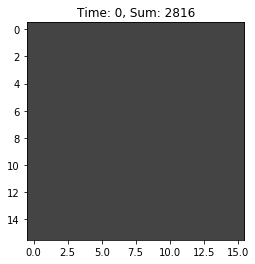

Sleep 1 min...
2816
Image saved to dram2_00001.png


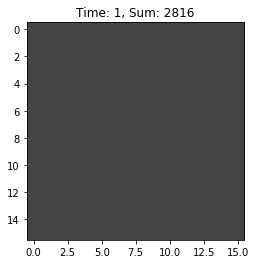

Sleep 2 min...
2816
Image saved to dram2_00002.png


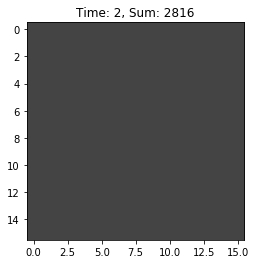

Sleep 3 min...
2816
Image saved to dram2_00003.png


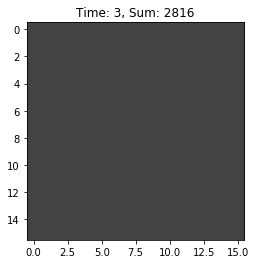

Sleep 4 min...
2807
Image saved to dram2_00004.png


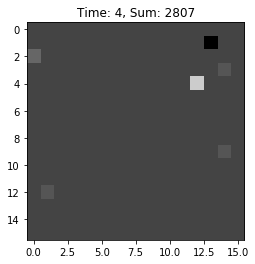

Sleep 5 min...
2783
Image saved to dram2_00005.png


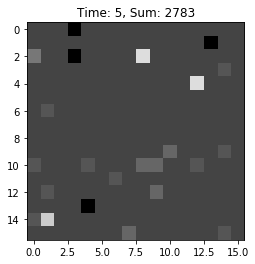

Sleep 6 min...
2713
Image saved to dram2_00006.png


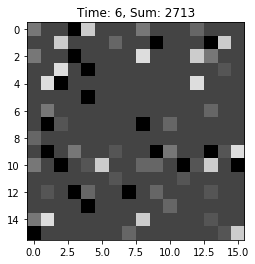

Sleep 7 min...
2590
Image saved to dram2_00007.png


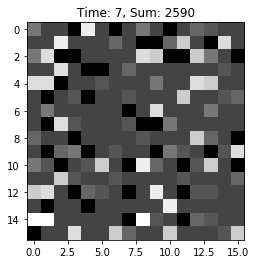

Sleep 8 min...
2418
Image saved to dram2_00008.png


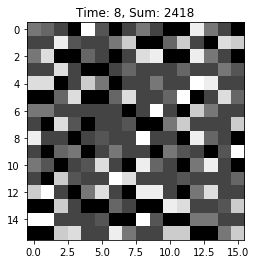

Sleep 9 min...
2267
Image saved to dram2_00009.png


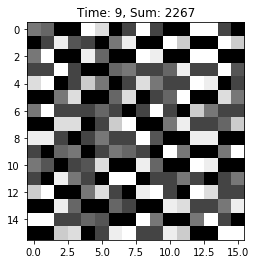

Sleep 10 min...
2196
Image saved to dram2_00010.png


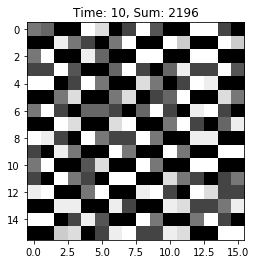

Sleep 11 min...
2149
Image saved to dram2_00011.png


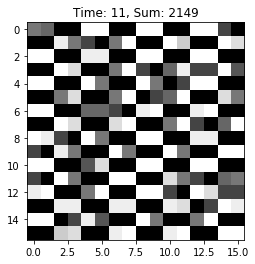

Sleep 12 min...
2074
Image saved to dram2_00012.png


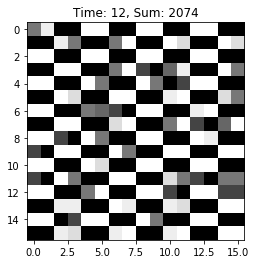

Sleep 13 min...
2010
Image saved to dram2_00013.png


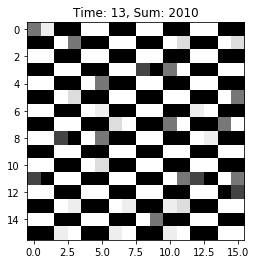

Sleep 14 min...
1984
Image saved to dram2_00014.png


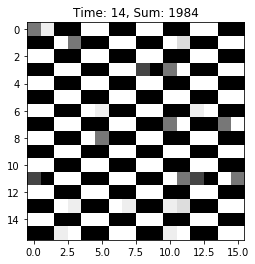

Sleep 15 min...
1963
Image saved to dram2_00015.png


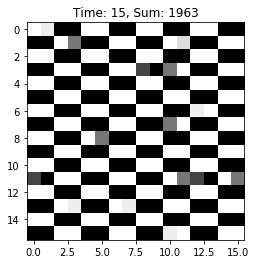

Sleep 16 min...
1941
Image saved to dram2_00016.png


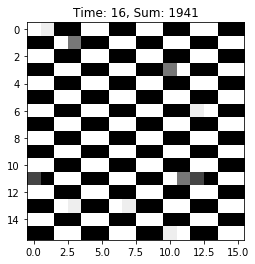

Sleep 17 min...


KeyboardInterrupt: 

In [119]:
ser.flush()
ser.write( bytes( [ 102, 32, 98, 10 ] ) ) # "f b\n"
sleep(5)
FILE="dump2.txt"
PREFIX="dram2"

print("GO")

with smart_open(FILE, 'w') as f:
    for t in range(0,100):
        # sleep t minutes:
        print("Sleep %d min..." % t )
        sleep(t*60)
        # dump ram
        ser.write( bytes( [ 68, 10 ] ) ) # "D\n"

        # read response , convert from bytes to ascii str, and split:
        dump, sumhex = str(ser.readline(),'ascii').split()

        # save to file
        f.write("%d %s\n" % (t, dump))
        f.flush()

        print(int(sumhex,16))
        
        d=np.array([ int(i,16) for i in dump ])
        d=d.reshape(16,16)
    
        plt.title('Time: {time}, Sum: {s}'.format(time=t, s=d.sum()))
        plt.imshow(15-d, cmap='gray',vmin=0, vmax=15)
        filename="%s_%05d.png"%(PREFIX,t)
        plt.savefig(filename)
        print("Image saved to %s" % filename)
        plt.show() # always show() after savefig()!!